# Problem Statement
1. The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS spam research. It contains one set of SMS messages in English of 5,574 messages, tagged according to beimg ham(legitimate) or spam.
2. The files contain one message per line. Each line is composed by two columns : v1 contains the label(ham or spam) and v2 contains the raw text.

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
email_df = pd.read_csv('emails.csv')
email_df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [4]:
email_df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [5]:
email_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


## Visualize the data

In [7]:
ham = email_df[email_df['spam'] == 0]
spam = email_df[email_df['spam'] == 1]

In [8]:
ham

,text,spam
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0
1369,Subject: sacramento weather station fyi - - ...,0
1370,Subject: from the enron india newsdesk - jan 1...,0
1371,Subject: re : powerisk 2001 - your invitation ...,0
1372,Subject: re : resco database and customer capt...,0
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [9]:
spam

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1
1364,Subject: would you like a $ 250 gas card ? do...,1
1365,"Subject: immediate reply needed dear sir , i...",1
1366,Subject: wanna see me get fisted ? fist bang...,1


In [10]:
print('Spam Percentage = ',(len(spam)/len(email_df))*100,'%')
print('Ham Percentage = ',(len(ham)/len(email_df))*100,'%')

Spam Percentage =  23.88268156424581 %
Ham Percentage =  76.11731843575419 %


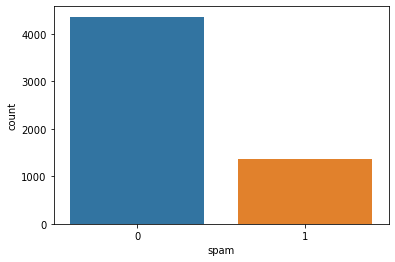

In [11]:
sns.countplot(email_df['spam'],label = 'Count Spam vs Ham')

## Create Testing and Training Dataset/Data Cleaning

In [12]:
import string
from nltk.corpus import stopwords

def message_cleaning(message):
    Test_punc_removed = [ char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [ word  for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer=message_cleaning,max_features=1500)
email_count_vectorizer = vectorizer.fit_transform(email_df['text'])

In [16]:
X = email_count_vectorizer
y = email_df['spam']

## Splitting the data into Training and Test Dataset

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

## Training the Naiive Bayes Classifier on the Training dataset

In [18]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

classifier.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Evaluating the model

In [19]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       856
           1       0.96      0.98      0.97       290

    accuracy                           0.98      1146
   macro avg       0.97      0.98      0.98      1146
weighted avg       0.98      0.98      0.98      1146



In [21]:
print(cm)
print(acc)

[[843  13]
 [  7 283]]
0.9825479930191972


In [22]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier,X = X_train,y = y_train,cv = 10)
print("Accuracy : {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation : {:.2f} %".format(accuracies.std()*100))

Accuracy : 97.84 %
Standard Deviation : 0.65 %


In [25]:
final = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
final.head(20)

,Actual,Predicted
4445,0,0
4118,0,0
3893,0,0
4210,0,0
5603,0,0
561,1,1
3761,0,0
4215,0,0
5596,0,0
177,1,1
